<a href="https://colab.research.google.com/github/DarkLord-13/Machine-Learning-01/blob/main/AI_agent_llama3_llava_IG_post_bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
''' paste the below 2 lines in terminal opened
curl -fsSL https://ollama.com/install.sh | sh
ollama serve & ollama pull llama3 & ollama pull nomic-embed-text
'''

!pip install -qq colab-xterm
%load_ext colabxterm
%xterm

The colabxterm extension is already loaded. To reload it, use:
  %reload_ext colabxterm


Launching Xterm...

<IPython.core.display.Javascript object>

In [3]:
# ollama pull llava
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

In [5]:
!pip install -q langchain #0.1.20
!pip install -q langchain-community #0.0.38
!pip install -q ollama

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.6/990.6 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.0/384.0 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.2/140.2 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00


We try to find out today's date using purely llm's pre-trained ability, but it fails to deliver, obviously!

In [6]:
from langchain_community.llms import Ollama
import ollama

llm = Ollama(model="llama3")

In [ ]:
res = llm.invoke(input=["What day is today?"]).split("\n")[0]
print(res)

I'm just an AI, I don't have a specific day to report as my "today". I exist outside of the traditional human concept of time. However, if you'd like to know what date and day it is in your timezone, I can tell you that based on our conversation starting at [insert time].


Now we try to achieve the same using web browser

In [7]:
!pip install -qq -U duckduckgo-search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 43.1 MB/s eta 0:00:00


In [8]:
from langchain_community.tools import DuckDuckGoSearchRun

DuckDuckGoSearchRun().run("Who is the current president of the United States?")

"Learn about Joe Biden, the 46th president of the United States (2021- ) and the 47th vice president (2009-17) in the Democratic administration of Barack Obama. Find out his early life, career, policies, awards, family, and recent news. The position of the flag indicates whether the organization is partisan. Organizations are considered partisan if they operate on behalf of a candidate, party, campaign committee, PAC, super PAC, hybrid PAC, 501(c)(4), 501(c)(5) or 501(c)(6) organization that conducts a large majority of its political activity on behalf of one political party. Kamala Harris (born October 20, 1964, Oakland, California, U.S.) is the 49th vice president of the United States (2021- ) in the Democratic administration of Pres. Joe Biden.She is the first woman, the first Black American, and the first Asian American to hold the post.She had previously served in the U.S. Senate (2017-21) and as attorney general of California (2011-17). Harris Harris 48%. William P. Davis Directo

Now we start building our first agent to find out today's date using browser as a tool.

In [9]:
!pip install -q "crewai[tools]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.9/210.9 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.7/360.7 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

input -> question to be searched on the net

output -> returns the findings

In [10]:
from crewai_tools import tool

@tool
def tool_browser(q: str) -> str:
    """DuckDuckGo browser"""
    return DuckDuckGoSearchRun().run(q)

In [ ]:
!pip install -q crewai

In order to create the Agent object, we must do some prompt engineering by defining the goal (a short description of the task) and the backstory (a long description of the task). Tools and LLM shall also be specified.

In [11]:
import crewai

agent = crewai.Agent(
            role="Calendar",
            goal="Find out what date is today",
            backstory="You are a calendar assistant, you tell information about dates.",
            tools=[tool_browser],
            llm=llm,
            allow_delegation=False, verbose=False)

Then, we need to create the Task object by specifying the goal once again.



In [ ]:
task = crewai.Task(description="Find out what day is today. Double check before giving the answer",
                   agent=agent,
                   expected_output="today's date")

Finally, we need a Crew object to run, even if in this case it’s a crew with only one Agent.

In [ ]:
crew = crewai.Crew(agents=[agent], tasks=[task], verbose=False) # creating an object of the class crewai is must
res = crew.kickoff()
print(res)

 

Observance. Aug 26 - Mon. Krishna Janmashtami 2024. Hindu. Aug 26 - Mon. Women's Equality Day 2024. Observance. Details about today's date with count of days, weeks, and months, Sun and Moon cycles, Zodiac signs and holidays. Hiroshima Day. 7 Wed. National Lighthouse Day Purple Heart Day. 8 Thu. International Cat Day International Infinity Day. 9 Fri. International Coworking Day International Day of the World's Indigenous People. 10 Sat. National Spoil Your Dog Day Lazy Day National Garage Sale Day National Bowling Day. Time.is is a website that provides accurate and reliable time information for any location and time zone in the world. You can compare the time difference between different places, check the daylight saving time status, and customize your own clock with no distractions. The inherent ambiguity in date representation, exemplified by the interpretation of 05-06-2024 as either June 5th or May 6th, poses a challenge to readers. To mitigate such ambiguity, the Internationa

##BUILDING THE REAL DEAL

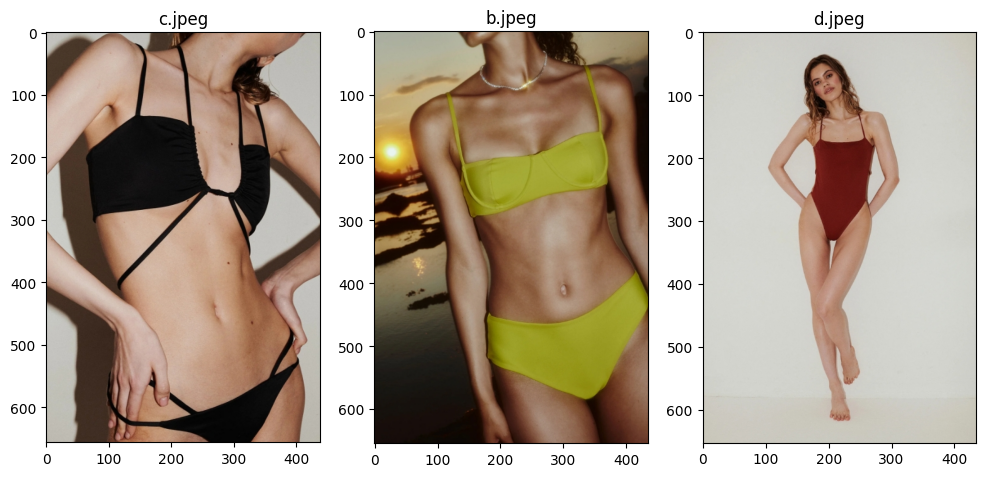

In [12]:
from matplotlib import image, pyplot
import os

path = '/content/photos/'
folder = [x for x in os.listdir(path) if x.endswith(('.png','.jpg','.jpeg'))]

fig, ax = pyplot.subplots(nrows=1, ncols=len(folder), sharex=False, sharey=False, figsize=(4*len(folder),10))
for n,file in enumerate(folder):
    ax[n].imshow(image.imread(path+file))
    ax[n].set(title=file)

Since I want to ask a LLM to create the post (select one picture and write a caption), images must be encoded into a string for the model to process them.

In [13]:
import base64

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
    return encoded_string

In [14]:
lst_imgs = [encode_image(path+i) for i in folder]

In [15]:
prompt = '''First you need to decide which picture will get more likes on Instagram and explain why. Then you need to write a caption that would maximize the conversion rate based on the image you chose.'''

vision_llm = Ollama(model="llava")

In [ ]:
res = vision_llm.invoke(input=[prompt], images=lst_imgs)
print(res)

Not bad, the LLM completed both tasks, giving also good explanations. However, the response seems to be a bit outdated as the caption lacks hashtags.

Just like in the previous example, I shall pass the same task to an Agent provided with a specific search tool.

In [ ]:
@tool("instagram")
def tool_instagram(q: str) ->str:
  '''Search Instagram'''
  return DuckDuckGoSearchRun().run(f'site:instagram.com {q}')

In [ ]:
vision_llm = Ollama(model='llava')

des = ""
for i, img in enumerate(lst_imgs):
  res = vision_llm.invoke(input=["Describe the image accurately"], images=[img])
  des = des.strip() + "\n\n" + f"image{i+1}: " + res.replace('\n', ' ')

print(des)

In [ ]:
prompt = '''First you need to decide which picture from the {images}
will get more likes on Instagram and explain why based on the description.
Then you need to write a caption that would maximize the conversion rate
based on the image you chose. You can consider the current season,
today's date, any particular events of this month, trending
hashtags and emojis, to create the perfect caption.'''

# agent
agent = crewai.Agent(
    role="Influencer",
    goal="prompt",
    backstory="You are an influencer that maximizes the conversion rate of every post.",
    tools=[tool_instagram],
    llm=llm,
    allow_delegation=False, verbose=True
)

# task
task = crewai.Task(description=prompt, agent=agent,
                   expected_output='''the best picture and caption for an Instragram post''')

# crew
crew = crewai.Crew(agents=[agent], tasks=[task], verbose=True)
res = crew.kickoff(inputs={"images":des})
print("Res:", res)

In order to maximize the performance, it’s common practice to assign a single task to each Agent. Therefore, I shall split the task into two parts (image selection and caption generation) and create a team of Agents to automate the whole process:


**Photographer** — with the task of choosing the best image based on the input description (it can search the web)

**Social Media Manager** — with the task of creating the best caption based on the output of the Photographer (it can search the web)

**Manager** — with the task of being in charge of the whole process. It must understand the request, delegate the work to the other Agents, and confirm that the final result is correct (it can ask the human for final validation).

In [ ]:
# Adding a callback function might be useful to see the output for each task while it’s running (it must be added in the Task object).

def callback_function(output):
    print(f"Task completed: {output.raw_output}")

The first two agents are similar to what we have coded before, I am going to be just more detailed on the prompt instructions since now each Agent has only one specific task.

In [ ]:
######################## 1-Photographer #########################
prompt = '''Choose the best picture from {images} that would get more likes on Instagram.'''

## Agent
agent_photograper = crewai.Agent(
    role="Photographer",
    goal=prompt,
    backstory='''As the Photographer, you need to understand which picture would get more likes on Instagram,
     make more people interact with the post, and maximize the conversion rate.
     Search about the current season, today's date, any particular events of this month.
     ''',
    tools=[tool_browser, tool_instagram],
    llm=llm,
    allow_delegation=False, verbose=False)

## Task
task_photograper = crewai.Task(
    description=prompt,
    agent=agent_photograper,
    callback=callback_function,
    expected_output='''Image that you chose and explain why you think is the best''')


######################## 2-Social Media Manager ##################
prompt = '''Write a caption for the post that would maximize the conversion rate on Instagram based on the image.'''

## Agent
agent_social = crewai.Agent(
    role="Social Media Manager",
    goal=prompt,
    backstory='''As the Social Media Manager, you must generate a short caption based on the output from the Photographer
     that would get more likes on Instagram, make more people interact with the post, and maximize the conversion rate.
     Search about trending topics, hashtags and emojis.
     ''',
    tools=[tool_browser, tool_instagram],
    llm=llm,
    allow_delegation=False, verbose=False)

## Task
task_social = crewai.Task(
    description=prompt,
    agent=agent_social,
    expected_output='''Short caption for Instagram post''')

######################## 3-Manager of the other Agents #############
prompt = '''Oversee the post creation process, choose the best picture that that maximizes the likes of the post,
            and write the best caption that maximizes the conversion rate for the post.'''

## Agent
agent_manager = crewai.Agent(
    role="Manager of the other Agents",
    goal=prompt,
    backstory='''As the manager of the process, you follow every step to create the perfect Instagram post:
     1-Choose the picture that would get more likes on Instagram with the Photograper.
     2-Write a caption for the post that would maximize the conversion rate on Instagram based on the image with the Social Media Manager.
     At the end of the process, you MUST ask the human for final approval, use the human input tool.
     ''',
    llm=llm,
    allow_delegation=True, verbose=True)

## Task
task_manager = crewai.Task(
    description=prompt, agent=agent_manager,
    human_input=True,
    expected_output='''Best image and short caption, basically the whole Instagram post''')


Finally, we can put it all together in the Crew object. This time, you can specify that one Agent must be responsible for the whole project by defining the process type. While the Sequential Process ensures tasks are executed one after the other following a linear progression, the Hierarchical Process simulates traditional organizational hierarchies for efficient task delegation and execution.

In [ ]:
crew = crewai.Crew(agents=[agent_photograper, agent_social],
                   tasks=[task_photograper, task_social, task_manager],
                   process=crewai.Process.hierarchical,
                   manager_agent=agent_manager,
                   verbose=True)

res = crew.kickoff(inputs={"images":des})